# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle, os
from IPython.display import clear_output

In [2]:
from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
pd.options.display.max_colwidth = -1

from dsutils import *

# Data

In [4]:
data = pd.read_csv('data.csv')

# Vectorizisation

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
vectorizer = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2))
vector = vectorizer.fit_transform(data['Text'].astype(str))

In [7]:
y = data['Spam'].astype('int').values

In [8]:
print('X shape', vector.shape)
print('Y shape', y.shape)

X shape (14868, 579511)
Y shape (14868,)


# SMOTE

In [9]:
from imblearn.over_sampling import SMOTE

sampler = SMOTE(sampling_strategy=1.00)

Using TensorFlow backend.


In [10]:
vector, y = sampler.fit_resample(vector, y)

In [11]:
print('X shape', vector.shape)
print('Y shape', y.shape)

X shape (23578, 579511)
Y shape (23578,)


# Machine Learning

In [12]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier

## Multinomial NB

Mean Loss 0.5385106461074749 +- 0.003677775867262263


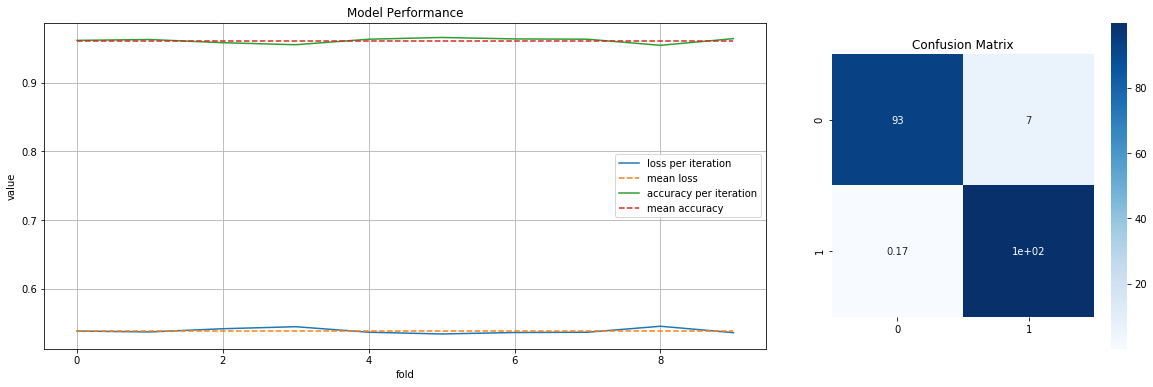

In [13]:
model = MultinomialNB()
mnb_performance, mnb_cm, mnb_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(mnb_performance['loss']), '+-', np.std(mnb_performance['loss']))

## Bernoulli NB

Mean Loss 0.6752911490613382 +- 0.008996572043923439


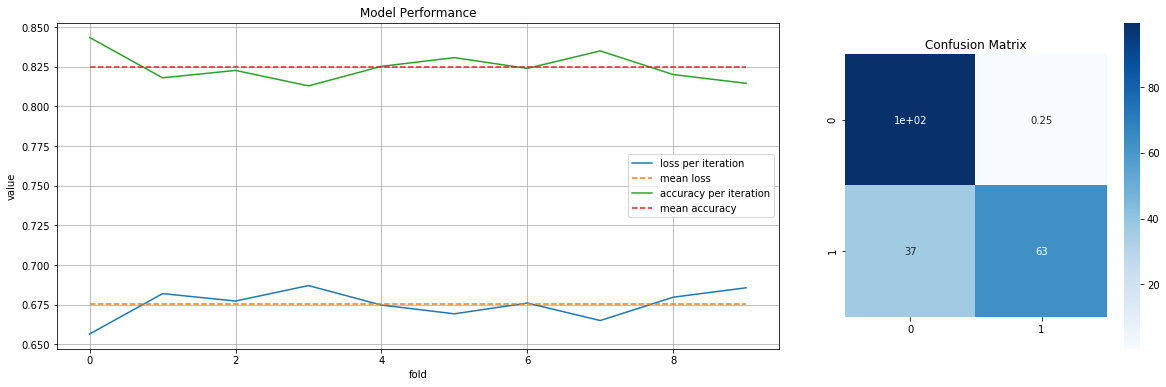

In [14]:
model = BernoulliNB()
bnb_performance, bnb_cm, bnb_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(bnb_performance['loss']), '+-', np.std(bnb_performance['loss']))

## Logistic Regression

Mean Loss 0.5448726889711516 +- 0.003670478760287901


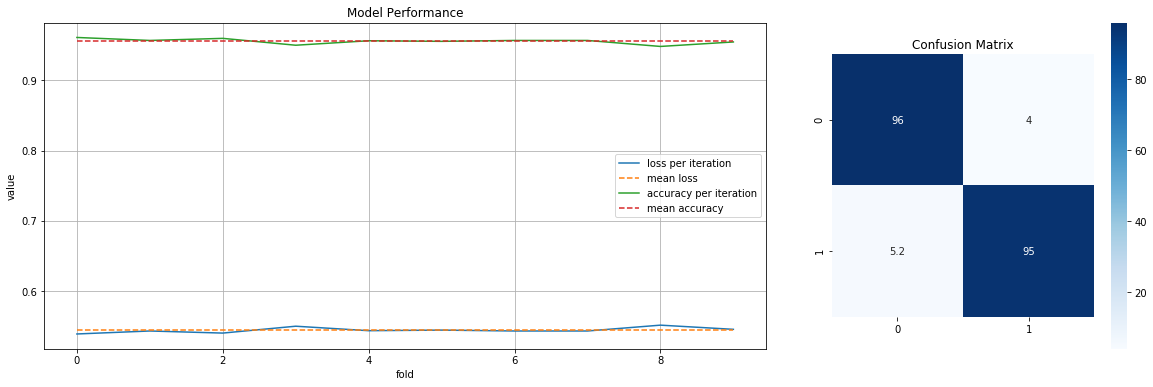

In [15]:
model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, random_state=101, warm_start=True)
lr1_performance, lr1_cm, lr1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(lr1_performance['loss']), '+-', np.std(lr1_performance['loss']))

Mean Loss 0.5187463182414068 +- 0.002545222024837108


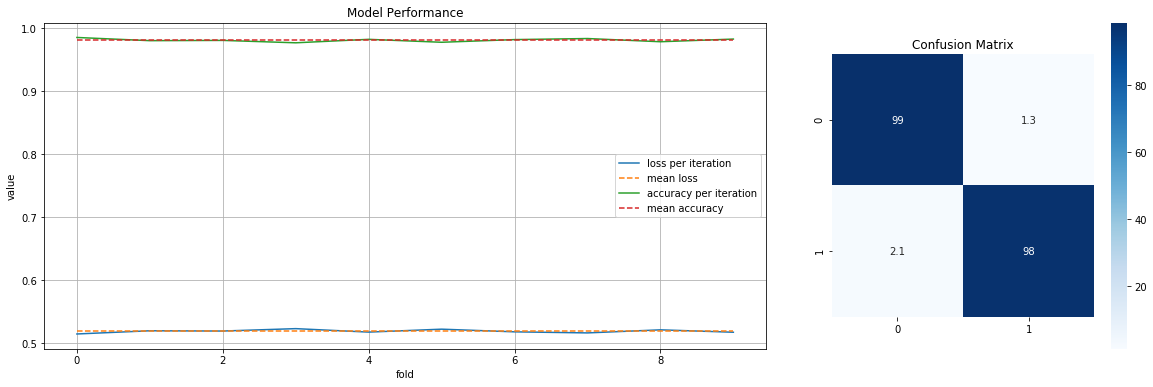

In [16]:
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=101, warm_start=True)
lr2_performance, lr2_cm, lr2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(lr2_performance['loss']), '+-', np.std(lr2_performance['loss']))

## SGD Classifier - log loss

Mean Loss 0.5625584628178817 +- 0.004430387917326271


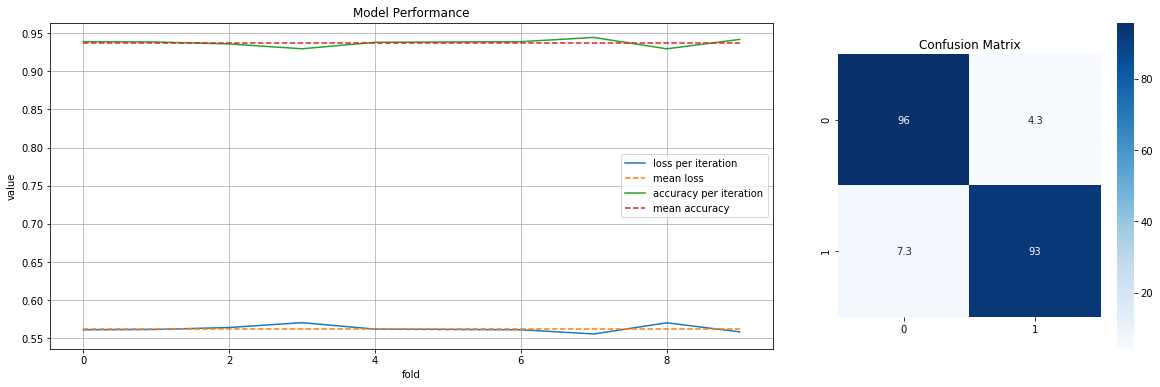

In [17]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True)
sgdl1_performance, sgdl1_cm, sgdl1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdl1_performance['loss']), '+-', np.std(sgdl1_performance['loss']))

Mean Loss 0.5282890046899802 +- 0.002772521295336902


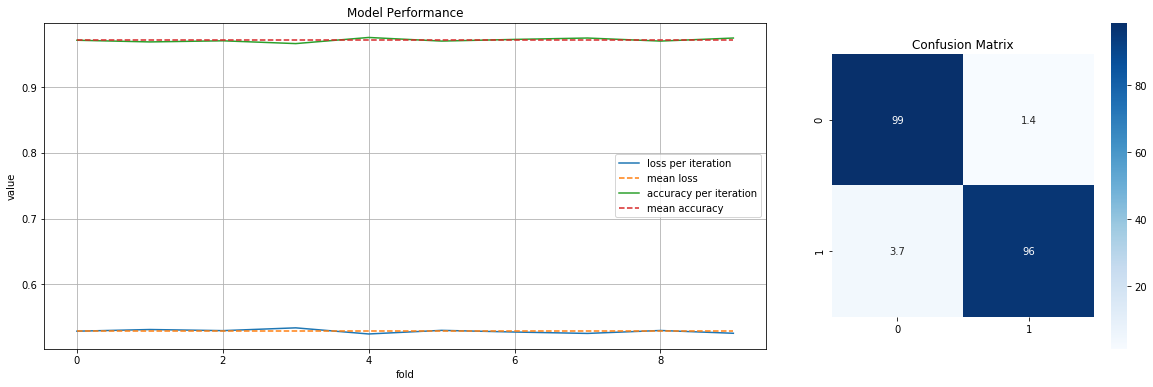

In [18]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True)
sgdl2_performance, sgdl2_cm, sgdl2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdl2_performance['loss']), '+-', np.std(sgdl2_performance['loss']))

## SGD Classifier - hinge loss

Mean Loss 0.5461450075803294 +- 0.0044594699744633665


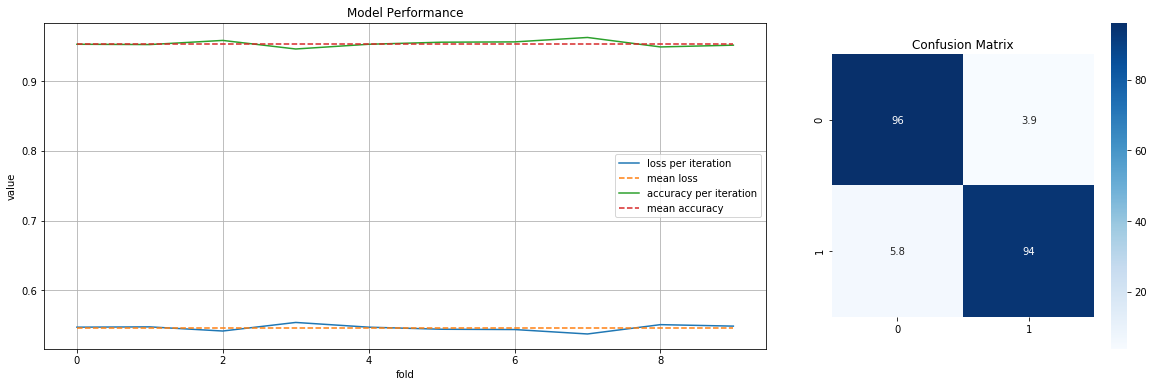

In [19]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True)
sgdh1_performance, sgdh1_cm, sgdh1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdh1_performance['loss']), '+-', np.std(sgdh1_performance['loss']))

Mean Loss 0.5109424834188168 +- 0.0019632135102459983


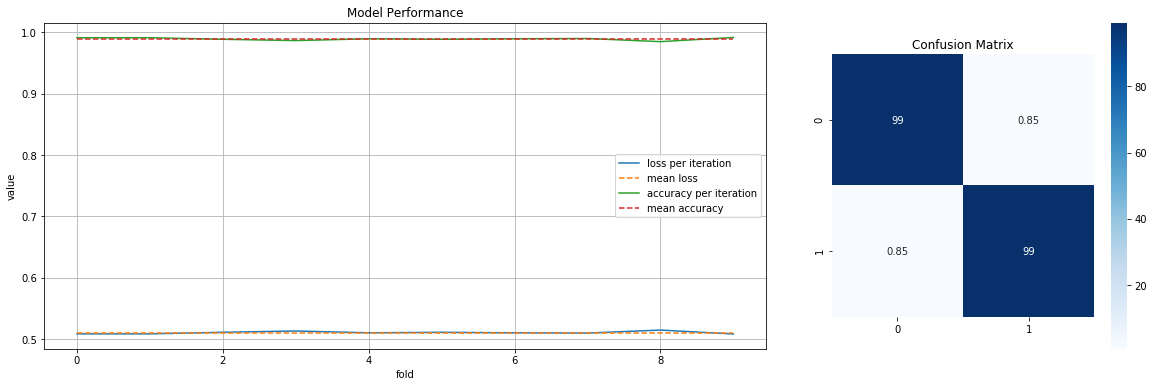

In [20]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True)
sgdh2_performance, sgdh2_cm, sgdh2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdh2_performance['loss']), '+-', np.std(sgdh2_performance['loss']))

## SGD Classifier - perceptron loss

Mean Loss 0.6429322470053831 +- 0.0850829110239831


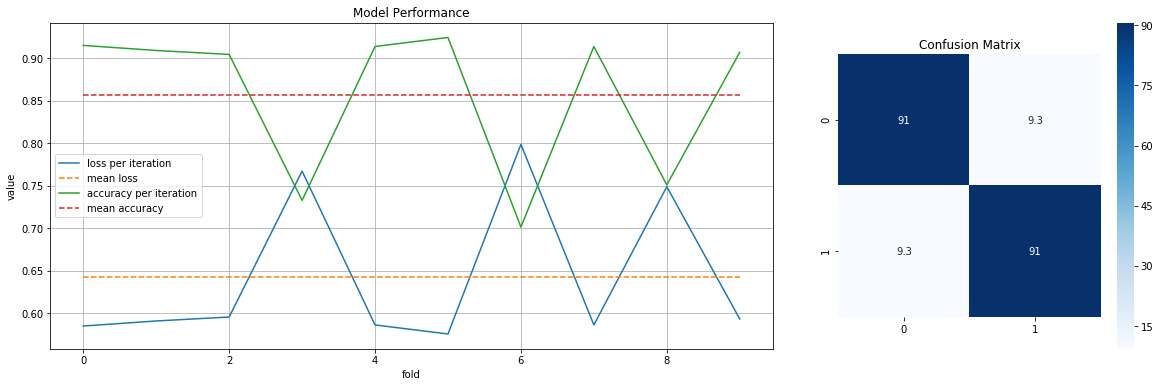

In [21]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True)
sgdp1_performance, sgdp1_cm, sgdp1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdp1_performance['loss']), '+-', np.std(sgdp1_performance['loss']))

Mean Loss 0.5125540905889843 +- 0.003043232346414016


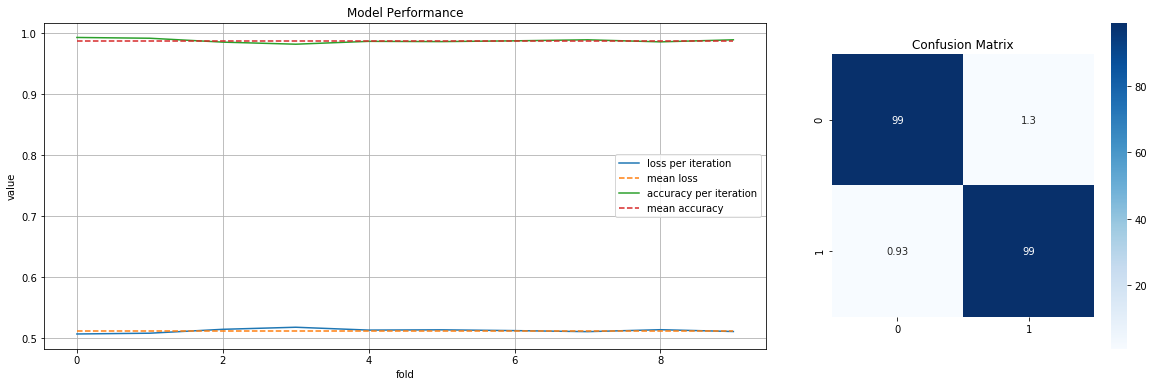

In [22]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True)
sgdp2_performance, sgdp2_cm, sgdp2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdp2_performance['loss']), '+-', np.std(sgdp2_performance['loss']))

## Decision Tree

Mean Loss 0.5390620147590615 +- 0.005579387367210965


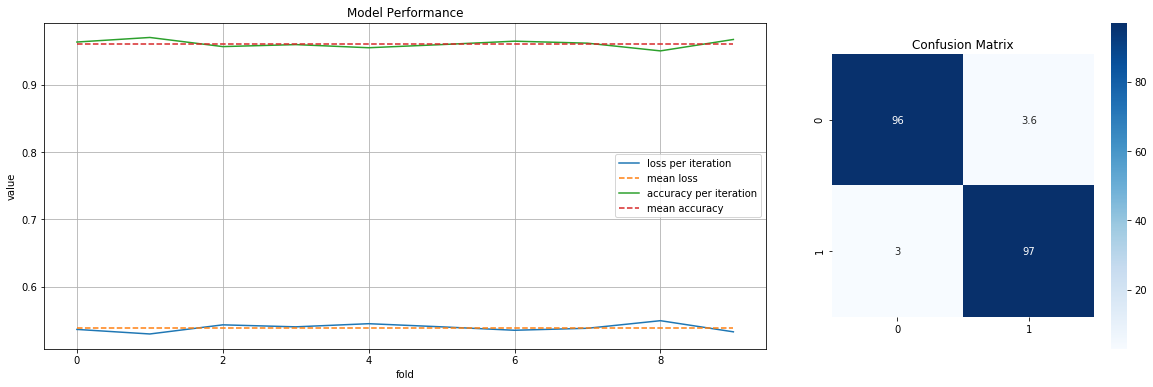

In [23]:
model = DecisionTreeClassifier(random_state=101)
dt_performance, dt_cm, dt_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(dt_performance['loss']), '+-', np.std(dt_performance['loss']))

In [24]:
cm = [
    mnb_cm, bnb_cm, lr1_cm, lr2_cm, sgdl1_cm, sgdl2_cm, sgdh1_cm, sgdh2_cm, sgdp1_cm, sgdp2_cm, dt_cm
]

model = [
    'MultinomialNB', 'BernoulliNB', 'LogisticRegression1', 'LogisticRegression2', 'SGDClassifierL1', 'SGDClassifierL2',
    'SGDClassifierH1', 'SGDClassifierH2', 'SGDClassifierP1', 'SGDClassifierP2', 'DecisionTreeClassifier'
]

performance = pd.DataFrame({
    'FP': [x[0][1] for x in cm],
    'FN': [x[1][0] for x in cm]
}, index=model)

In [25]:
performance

,FP,FN
MultinomialNB,6.955047,0.169779
BernoulliNB,0.254453,36.842105
LogisticRegression1,3.986429,5.178268
LogisticRegression2,1.272265,2.122241
SGDClassifierL1,4.325700,7.300509
SGDClassifierL2,1.357082,3.650255
SGDClassifierH1,3.901612,5.772496
SGDClassifierH2,0.848176,0.848896
SGDClassifierP1,9.329941,9.337861
SGDClassifierP2,1.272265,0.933786


Mean Loss 0.5144202046634949 +- 0.002201644184467751


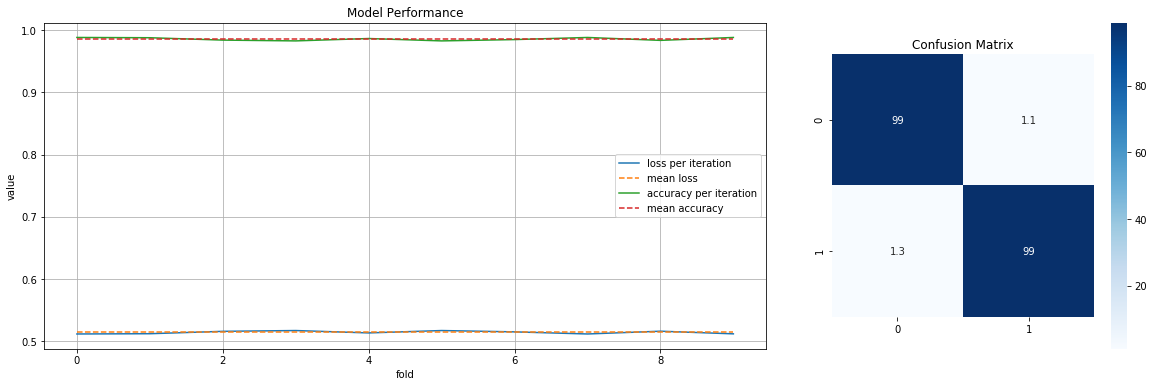

In [26]:
model = VotingClassifier(estimators=[
    ('MNB', MultinomialNB()),
    ('SGD-L1', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-L2', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-H1', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-H2', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-P2', SGDClassifier(loss='perceptron', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True,
                             class_weight='balanced', early_stopping=True)),
    ('LR-1', LogisticRegression(solver='liblinear', max_iter=100000, class_weight='balanced', random_state=101, 
                                warm_start=True)),
    ('LR-2', LogisticRegression(solver='lbfgs', max_iter=100000, class_weight='balanced', random_state=101, warm_start=True)),
    ('DT', DecisionTreeClassifier(random_state=101)),
], weights=[2, 1, 1, 1, 1, 4, 1, 2, 2])
v_performance, v_cm, v_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(v_performance['loss']), '+-', np.std(v_performance['loss']))

In [27]:
pickle.dump(vectorizer, open('Vectorizer-spam-3.pkl', 'wb'))

In [28]:
pickle.dump(v_model, open('SpamClassifier-3.pkl', 'wb'))